In [1344]:
# import dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
data = pd.concat([train_data, test_data], ignore_index = True, sort = False)

In [1345]:
#check info of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7398 non-null   int64  
 1   belongs_to_collection  1481 non-null   object 
 2   budget                 7398 non-null   int64  
 3   genres                 7375 non-null   object 
 4   homepage               2366 non-null   object 
 5   imdb_id                7398 non-null   object 
 6   original_language      7398 non-null   object 
 7   original_title         7398 non-null   object 
 8   overview               7376 non-null   object 
 9   popularity             7398 non-null   float64
 10  poster_path            7396 non-null   object 
 11  production_companies   6984 non-null   object 
 12  production_countries   7241 non-null   object 
 13  release_date           7397 non-null   object 
 14  runtime                7392 non-null   float64
 15  spok

In [1346]:
# check missing values

data.isnull().sum()

id                          0
belongs_to_collection    5917
budget                      0
genres                     23
homepage                 5032
imdb_id                     0
original_language           0
original_title              0
overview                   22
popularity                  0
poster_path                 2
production_companies      414
production_countries      157
release_date                1
runtime                     6
spoken_languages           62
status                      2
tagline                  1460
title                       3
Keywords                  669
cast                       26
crew                       38
revenue                  4398
dtype: int64

In [1347]:
# check columns with int or float values

data.describe()

,id,budget,popularity,runtime,revenue
count,7398.000000,7.398000e+03,7398.000000,7392.000000,3.000000e+03
mean,3699.500000,2.260146e+07,8.514968,107.717262,6.672585e+07
std,2135.762978,3.694867e+07,12.165794,21.480040,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,1850.250000,0.000000e+00,3.933124,94.000000,2.379808e+06
50%,3699.500000,7.500000e+06,7.435844,104.000000,1.680707e+07
75%,5548.750000,2.800000e+07,10.920002,118.000000,6.891920e+07
max,7398.000000,3.800000e+08,547.488298,338.000000,1.519558e+09


In [1348]:
# check the number of budget and runtime which have ZERO

print(len(data[data['budget'] == 0]))
print(len(data[data['runtime'] == 0]))

2023
21


Text(0, 0.5, 'revenue')

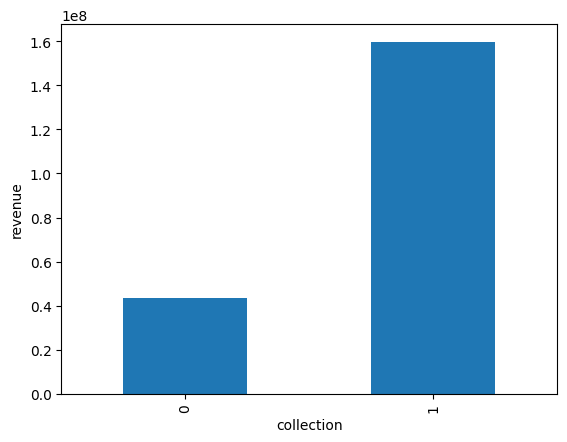

In [1349]:
# analyze belongs_to_collection

data['collection'] = np.where(data['belongs_to_collection'].isnull(), 0, 1)
data.groupby(by = 'collection')['revenue'].mean().plot.bar()
plt.ylabel('revenue')

Text(0, 0.5, 'revenue')

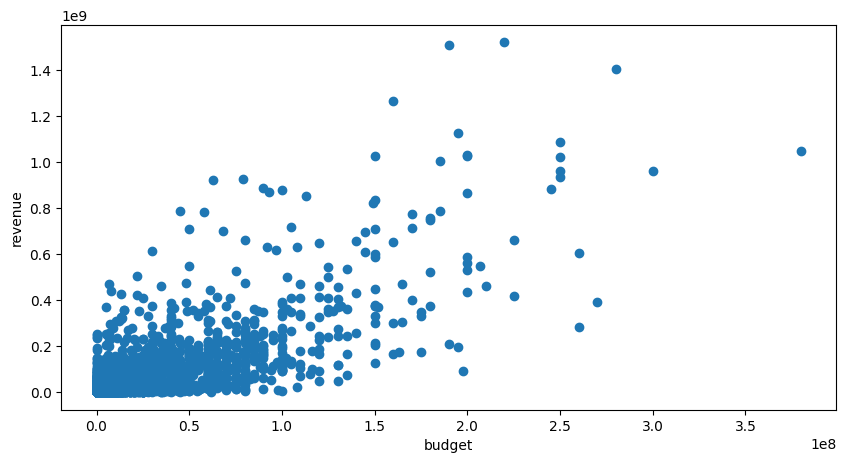

In [1350]:
# analyze budget

plt.figure(figsize = (10, 5))
plt.scatter(data['budget'], data['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Crime'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'War'),
  Text(5, 0, 'Fantasy'),
  Text(6, 0, 'Horror'),
  Text(7, 0, 'Foreign'),
  Text(8, 0, 'Action'),
  Text(9, 0, 'Family'),
  Text(10, 0, 'Mystery'),
  Text(11, 0, 'Thriller'),
  Text(12, 0, 'Documentary'),
  Text(13, 0, 'Music'),
  Text(14, 0, 'History'),
  Text(15, 0, 'Western'),
  Text(16, 0, 'TV Movie'),
  Text(17, 0, 'Romance'),
  Text(18, 0, 'Science Fiction'),
  Text(19, 0, 'Adventure')])

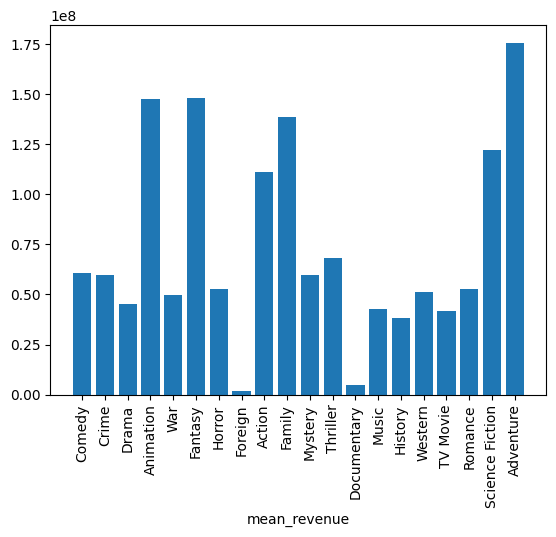

In [1351]:
# analyze genres

genre = set()
for i in data.index:
    if str(data.loc[i]['genres']) != 'nan':
        genres = ast.literal_eval(data.loc[i]['genres'])
        for j in range(len(genres)):
            data.at[i, genres[j]['name']] = 1
            genre.add(genres[j]['name'])
            
genre_revenue = {}
for genre in genre:
    revenue = data[data[genre] == 1]['revenue'].mean()
    genre_revenue.update({genre:revenue})
    
genre_list = list(genre_revenue.keys())
revenue = list(genre_revenue.values())
plt.bar(range(len(genre_revenue)), revenue, tick_label=genre_list)
plt.xlabel('mean_revenue')
plt.xticks(rotation = 90)

Text(0, 0.5, 'mean-revenue')

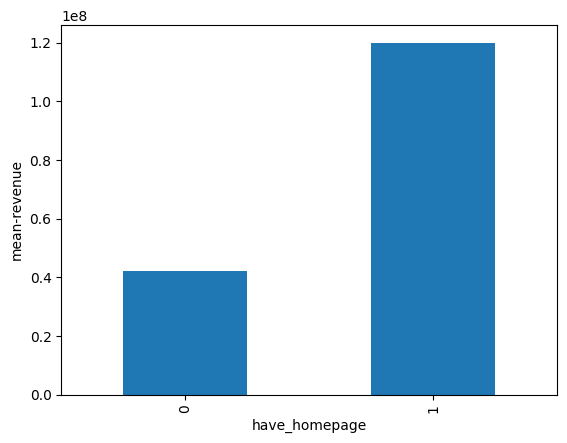

In [1352]:
# anaylize homepage

data['have_homepage'] = np.where(data['homepage'].isnull(), 0, 1)
data.groupby(by = 'have_homepage')['revenue'].mean().plot.bar()
plt.ylabel('mean-revenue')

Text(0, 0.5, 'mean-revenue')

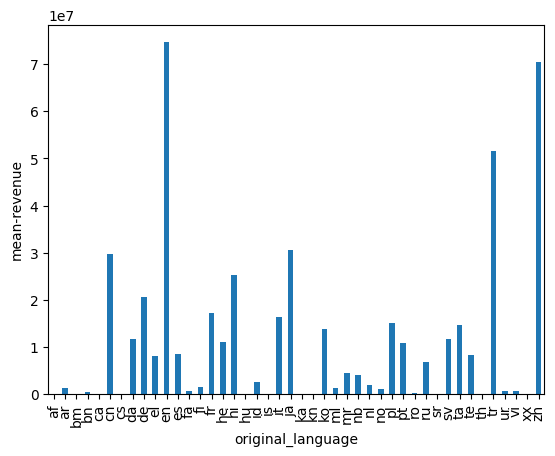

In [1353]:
# analyze original_language

data.groupby(by = 'original_language')['revenue'].mean().plot.bar()
plt.ylabel('mean-revenue')

Text(0, 0.5, 'mean-revenue')

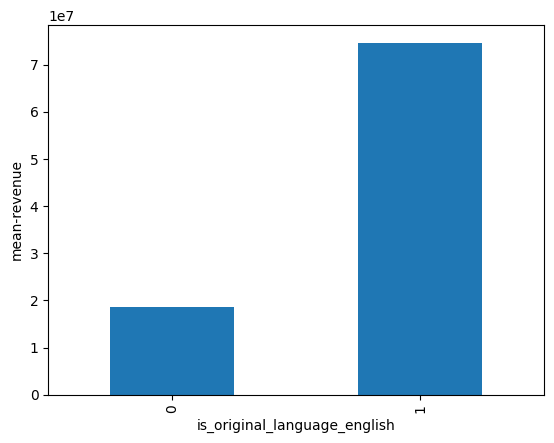

In [1354]:
# add column is_original_language_english

data['is_original_language_english'] = np.where(data['original_language'] == 'en', 1, 0)
data.groupby(by = 'is_original_language_english')['revenue'].mean().plot.bar()
plt.ylabel('mean-revenue')

Text(0, 0.5, 'revenue')

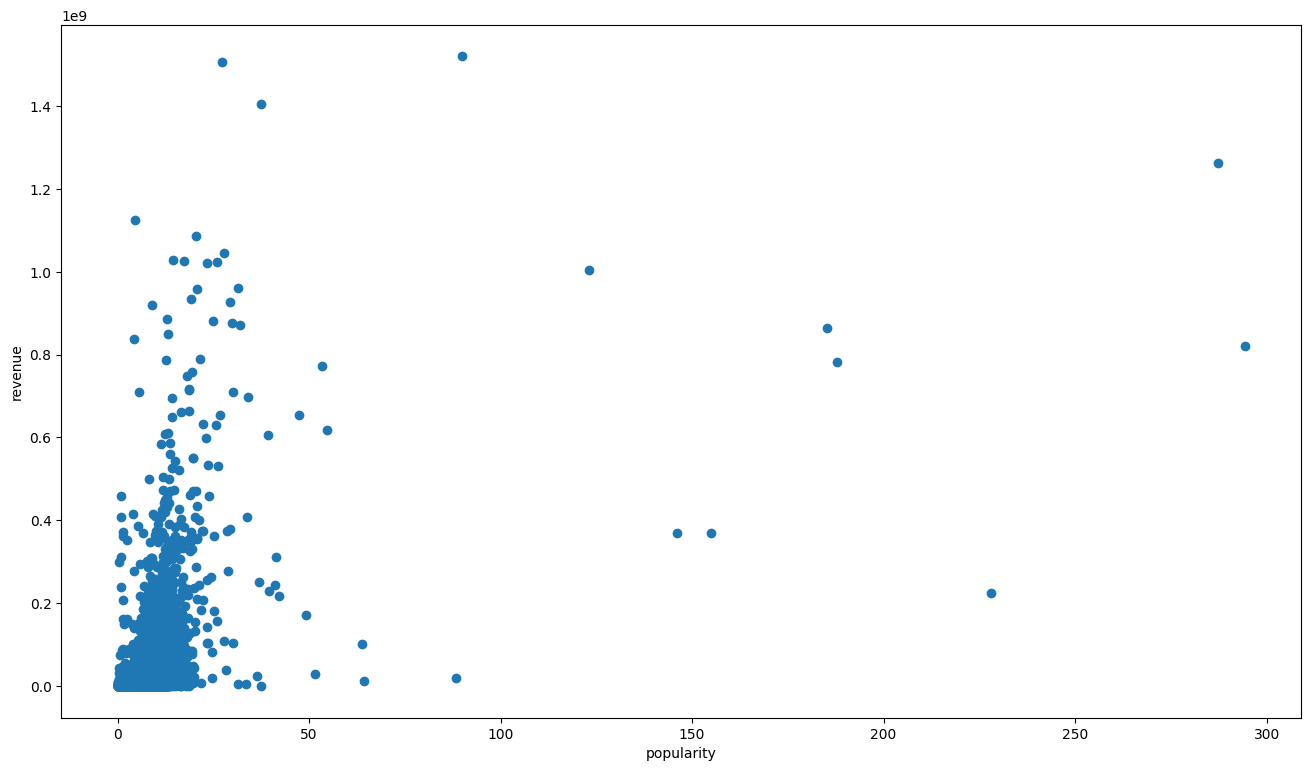

In [1355]:
# analyze popularity

plt.figure(figsize = (16, 9))
plt.scatter(x = data['popularity'], y = data['revenue'])
plt.xlabel('popularity')
plt.ylabel('revenue')

Text(0, 0.5, 'revenue')

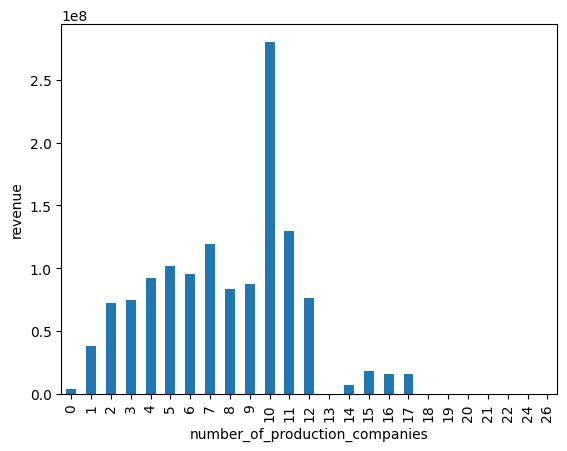

In [1356]:
# analyze production_companies

production_companies = []
for i in data.index:
    if str(data.loc[i]['production_companies']) != 'nan':
        production_companies.append(len(ast.literal_eval(data.loc[i]['production_companies'])))
    else:
        production_companies.append(0)

data['number_of_production_companies'] = production_companies
data.groupby(by = 'number_of_production_companies')['revenue'].mean().plot.bar()
plt.ylabel('revenue')

Text(0, 0.5, 'revenue')

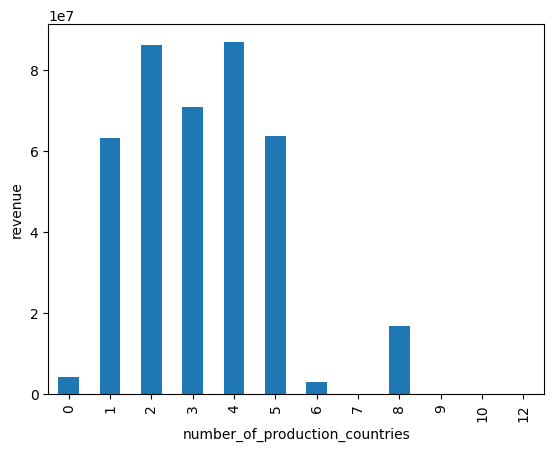

In [1357]:
# analyze product_countries

production_countries = []
for i in data.index:
    if str(data.loc[i]['production_countries']) != 'nan':
        production_country = ast.literal_eval(data.loc[i]['production_countries'])
        production_countries.append(len(production_country))
        
        isUSA = -1
        for j in range(len(production_country)):
            if production_country[j]['iso_3166_1'] == 'US':
                data.at[i, 'is_USA_produced'] = 1
                isUSA = 0
        if isUSA == -1:
            data.at[i, 'is_USA_produced'] = 0
    else:
        production_countries.append(0)
        data.at[i, 'is_USA_produced'] = 0
        
data['number_of_production_countries'] = production_countries
data.groupby(by = 'number_of_production_countries')['revenue'].mean().plot.bar()
plt.ylabel('revenue')

<Axes: xlabel='is_USA_produced'>

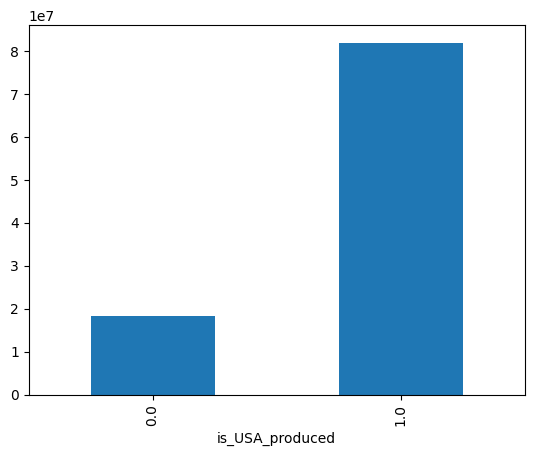

In [1358]:
data.groupby(by = 'is_USA_produced')['revenue'].mean().plot.bar()

In [1359]:
# analyze release_date

data['release_date'] = pd.to_datetime(data['release_date'])
data['release_year'] = data['release_date'].dt.year

for i in data.index:
    if data.loc[i]['release_year'] > 2022:
        date = data.loc[i]['release_year'] - 100
        data.at[i, 'release_year'] = str(date)

C:\Users\manht\AppData\Local\Temp\ipykernel_21216\2519444901.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['release_date'] = pd.to_datetime(data['release_date'])


Text(0, 0.5, 'revenue')

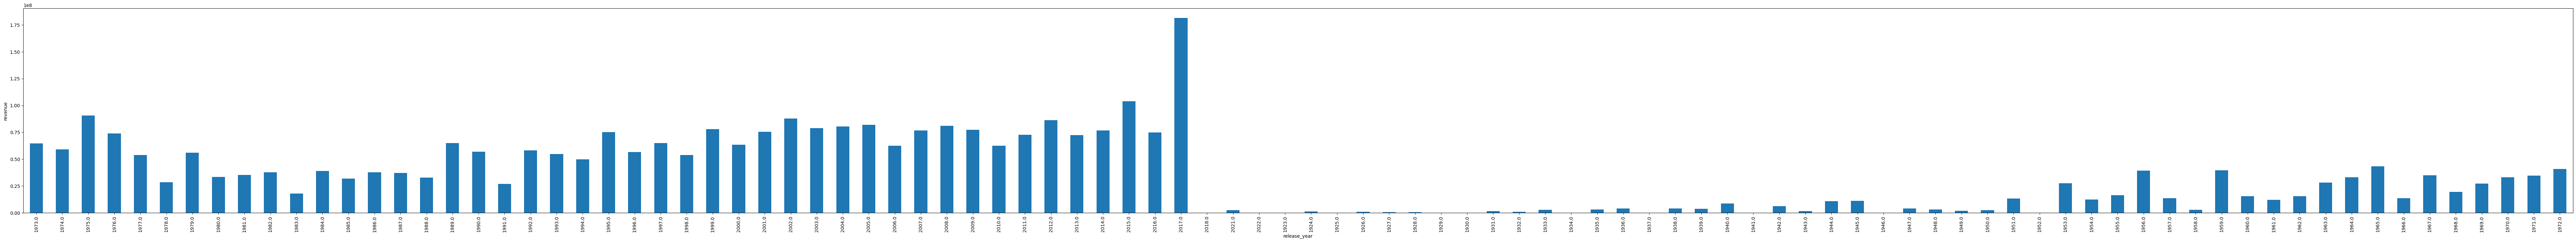

In [1360]:
plt.figure(figsize = (len(pd.unique(data['release_year'])), 8))
data.groupby(by = 'release_year')['revenue'].mean().plot.bar()
plt.ylabel('revenue')

<Axes: xlabel='runtime_group'>

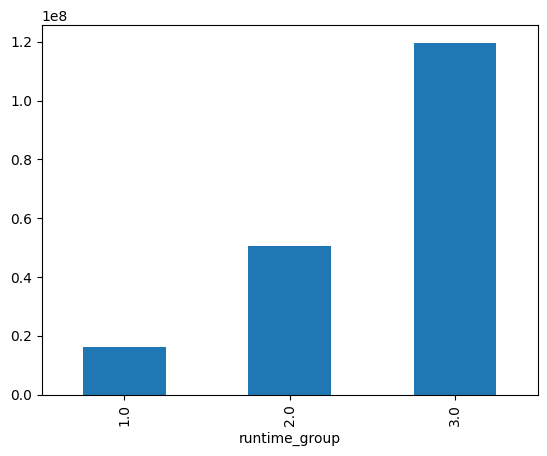

In [1361]:
# analyze runtime

for i in data.index:
    if data.loc[i]['runtime'] < 60:
        data.at[i, 'runtime_group'] = 1
    elif (data.loc[i]['runtime'] >= 60) & (data.loc[i]['runtime'] < 120):
        data.at[i, 'runtime_group'] = 2
    else:
        data.at[i, 'runtime_group'] = 3
        
data.groupby(by = 'runtime_group')['revenue'].mean().plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 [Text(0, 0, '한국어/조선말'),
  Text(1, 0, 'No Language'),
  Text(2, 0, 'Galego'),
  Text(3, 0, 'български език'),
  Text(4, 0, 'فارسی'),
  Text(5, 0, 'Český'),
  Text(6, 0, 'Magyar'),
  Text(7, 0, 'Tiếng Việt'),
  Text(8, 0, 'Türkçe'),
  Text(9, 0, 'Esperanto'),
  Text(10, 0, 'Srpski'),
  Text(11, 0, 'Wolof'),
  Text(12, 0, 'Eesti'),
  Text(13, 0, 'Bosanski'),
  Text(14, 0, 'தமிழ்'),
  Text(15, 0, 'বাংলা'),
  Text(16, 0, 'Kiswahili'),
  Text(17, 0, 'Íslenska'),
  Text(18, 0, 'Cymraeg'),
  Text(19, 0, 'Pусский'),
  Text(20, 0, 'Latin'),
  Text(21, 0, 'Dansk'),
  Text(22, 0, 'ਪੰਜਾਬੀ'),
  Text(23, 0, 'Bahasa melayu'),
  Text(24, 0, 'Français'),
  Text(25, 0, 'اردو'),
  Text(26, 0, 'پښتو'),
  Text(27, 0, 'עִבְרִי

C:\Users\manht\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\manht\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
C:\Users\manht\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  func(*args, **kwargs)
C:\Users\manht\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  func(*args, **kwargs)
C:\Users\manht\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  func(*args, *

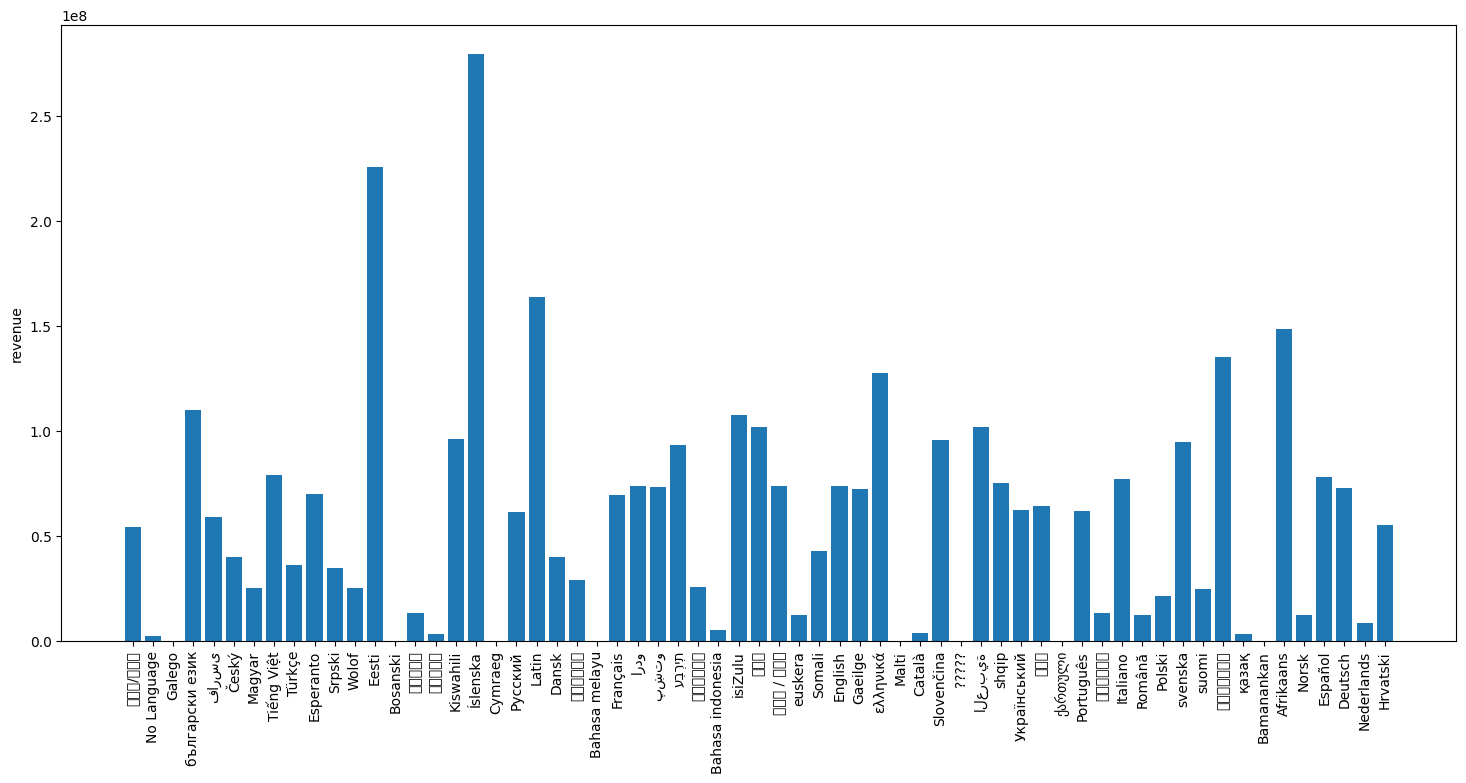

In [1362]:
# analyze spoken_languages

copy = data.copy()
spoken_languages = set()
number_of_spoken_languages = []

for i in copy.index:
    if str(copy.loc[i]['spoken_languages']) != 'nan':
        languages = ast.literal_eval(copy.loc[i]['spoken_languages'])
        number_of_spoken_languages.append(len(languages))
        for j in range(len(languages)):
            copy.at[i, languages[j]['name']] = 1
            spoken_languages.add(languages[j]['name'])
    else:
        number_of_spoken_languages.append(0)
        
languages_revenue = {}

for language in spoken_languages:
    if language != "":
        revenue = copy[copy[language] == 1]['revenue'].mean()
        languages_revenue.update({language:revenue})
        
language_list = list(languages_revenue.keys())
revenue = list(languages_revenue.values())
plt.figure(figsize = (18, 8))
plt.bar(range(len(languages_revenue)), revenue, tick_label = language_list)
plt.ylabel('revenue')
plt.xticks(rotation = 90)

Text(0, 0.5, 'revenue')

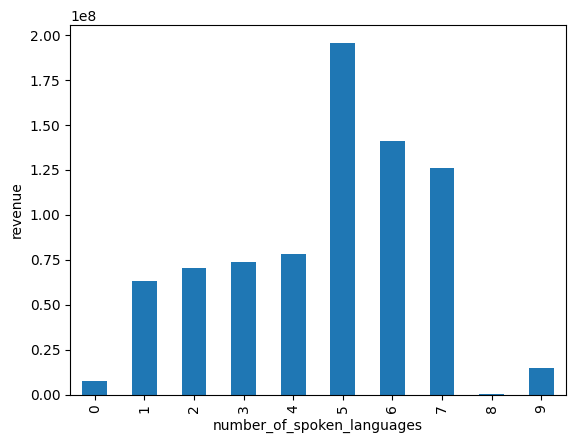

In [1363]:
data['number_of_spoken_languages'] = number_of_spoken_languages
data.groupby(by = 'number_of_spoken_languages')['revenue'].mean().plot.bar()
plt.ylabel('revenue')

<Axes: xlabel='status'>

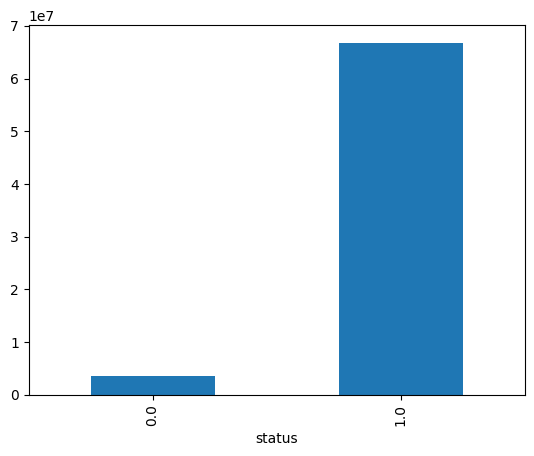

In [1364]:
# analyze status

data = data.copy()
data['status'] = data['status'].map({'Released' : 1, 'Rumored' : 0})

data.groupby(by = 'status')['revenue'].mean().plot.bar()

In [1365]:
# drop columns which are not used

data = data.drop(['id', 'crew', 'belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'tagline', 'title', 'Keywords', 'cast'], axis=1)

In [1366]:
# fill genre data

for genre in genre_list:
    data[genre] = data[genre].replace('nan', np.nan).fillna(0)
    
data['status'] = data['status'].replace(np.nan, 1, regex = True) 

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data['release_year'] = imp.fit_transform(data[['release_year']])
    
data.isnull().sum()

budget                               0
popularity                           0
status                               0
revenue                           4398
collection                           0
Comedy                               0
Drama                                0
Family                               0
Romance                              0
Thriller                             0
Action                               0
Animation                            0
Adventure                            0
Horror                               0
Documentary                          0
Music                                0
Crime                                0
Science Fiction                      0
Mystery                              0
Foreign                              0
Fantasy                              0
War                                  0
Western                              0
History                              0
TV Movie                             0
have_homepage            

In [1367]:
# split dataset into traindata and testdata

train_data = data.iloc[:3000, :]
test_data = data.iloc[3000:, :]

In [1368]:
# extract data

y = train_data['revenue']
X = train_data.drop('revenue', axis = 1)

X_test = test_data.drop('revenue', axis = 1)

In [1369]:
# ML training

model = SVR()
model.fit(X, y)

scores = cross_val_score(model, X, y, scoring = 'neg_root_mean_squared_error')
print(f'RMSE: {scores.mean()}')

RMSE: -145647193.5390911


In [1370]:
# predict

predictions = model.predict(X_test)
X_test.insert(0, 'id', range(3001, 3001 + len(X_test)))
output = pd.DataFrame({'id' : X_test.id, 'revenue' : predictions})
output.to_csv('submission.csv', index = False)